# EfficientNet Inference Example

**Acknowlegements:**
1. [Notebook](https://github.com/qubvel/efficientnet/blob/master/examples/inference_example.ipynb) on Github.  

**References:**
1. [EfficientNet](https://github.com/qubvel/efficientnet) for Keras (`efficientnet.keras`) and TensorFlow Keras (`efficientnet.tfkeras`) on Github.  

**Table of contents:**
1. [Setup](#Setup)  
2. [Import model & preprocessing](#Import-model-&-preprocessing)  
3. [Read test image](#Read-test-image)  
4. [Load pretrained model](#Load-pretrained-model)  
5. [Preprocess input](#Preprocess-input)  
6. [Predict](#Predict)  

## Setup

In [4]:
import os
import sys
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt

## Import model & preprocessing

In [3]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from efficientnet.tfkeras import EfficientNetB0
from efficientnet.tfkeras import center_crop_and_resize, preprocess_input

## Read test image

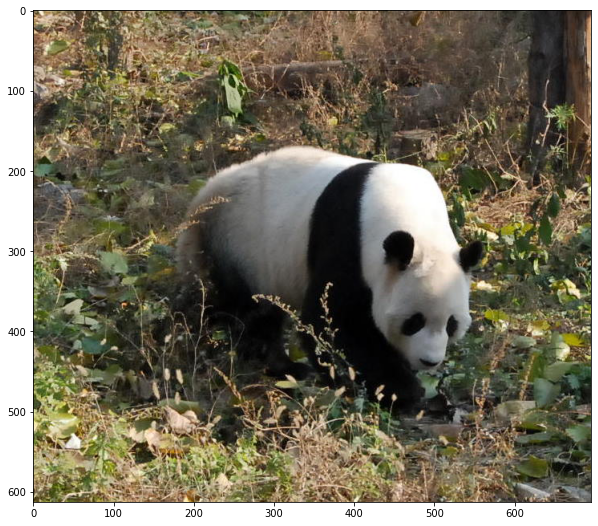

In [13]:
# test image
image = imread('../assets/panda.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

## Load pretrained model

In [6]:
# load pretrained model
model = EfficientNetB0(weights='imagenet')

21831680/21826536 [==============================] - 4s 0us/step


## Preprocess input

In [14]:
print(image.shape)

# preprocess input
image_size = model.input_shape[1]
print('image_size = {}'.format(image_size))
x = center_crop_and_resize(image, image_size=image_size)
print(x.shape)
x = preprocess_input(x)
print(x.shape)
x = np.expand_dims(x, 0)
print(x.shape)

(613, 696, 3)
image_size = 224
(224, 224, 3)
(224, 224, 3)
(1, 224, 224, 3)


## Predict

In [15]:
# make prediction and decode
y = model.predict(x)
decode_predictions(y)

40960/35363 [==================================] - 0s 0us/step


[[('n02510455', 'giant_panda', 0.75878656),
  ('n02134084', 'ice_bear', 0.008354771),
  ('n02132136', 'brown_bear', 0.007207258),
  ('n02509815', 'lesser_panda', 0.0041302457),
  ('n02120079', 'Arctic_fox', 0.004021086)]]